In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_raw = pd.read_csv('../DataProcessed/houston_airport_cleaned_generalized_2000-2022.csv')

In [4]:
df_raw = df_raw.drop(['STATION','DATE_year_month_day','ELEVATION','AT'],axis=1)

In [29]:
X_cols = [
    #'DATE_year',
          'DATE_month', 'DATE_day', 'DATE_hour', 
    #     'LATITUDE','LONGITUDE',
          'WND_angle', 'WND_speed', 'CIG_ceiling_height',
       'VIS_distance', 'TMP_temp_celsius', 'DEW_temp_celsius',
       'SLP_hectopascal']

y_col = ['AT_thunder']

In [30]:
df_raw

,DATE,DATE_year,DATE_month,DATE_day,DATE_hour,LATITUDE,LONGITUDE,WND_angle,WND_speed,CIG_ceiling_height,VIS_distance,TMP_temp_celsius,DEW_temp_celsius,SLP_hectopascal,AT_rain,AT_thunder,AT_tornado,AT_binary
0,2000-01-01T00:00:00,2000,1,1,0,29.98000,-95.36000,120.0,0.0,22000.0,16000.0,14.4,7.2,1016.4,0,0,0,0
1,2000-01-01T00:53:00,2000,1,1,0,29.98000,-95.36000,120.0,0.0,22000.0,16000.0,12.2,7.2,1017.0,0,0,0,0
2,2000-01-01T01:00:00,2000,1,1,1,29.98000,-95.36000,120.0,0.0,22000.0,16000.0,12.2,7.2,1017.0,0,0,0,0
3,2000-01-01T01:53:00,2000,1,1,1,29.98000,-95.36000,120.0,0.0,22000.0,16000.0,10.0,6.7,1017.4,0,0,0,0
4,2000-01-01T02:00:00,2000,1,1,2,29.98000,-95.36000,120.0,0.0,22000.0,16000.0,10.0,6.7,1017.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309423,2022-04-30T05:53:00,2022,4,30,5,29.98438,-95.36072,170.0,4.1,518.0,16093.0,23.3,20.0,1010.2,0,0,0,0
309424,2022-04-30T05:59:00,2022,4,30,5,29.98438,-95.36072,170.0,4.1,518.0,16093.0,23.3,20.0,1010.2,0,0,0,0
309425,2022-04-30T06:53:00,2022,4,30,6,29.98438,-95.36072,170.0,4.1,488.0,16093.0,23.3,20.0,1009.6,0,0,0,0
309426,2022-04-30T07:32:00,2022,4,30,7,29.98438,-95.36072,170.0,3.1,22000.0,16093.0,23.3,20.0,1009.6,0,0,0,0


Text(0.5, 1.0, 'Histogram of bad weathers: 2000-2022')

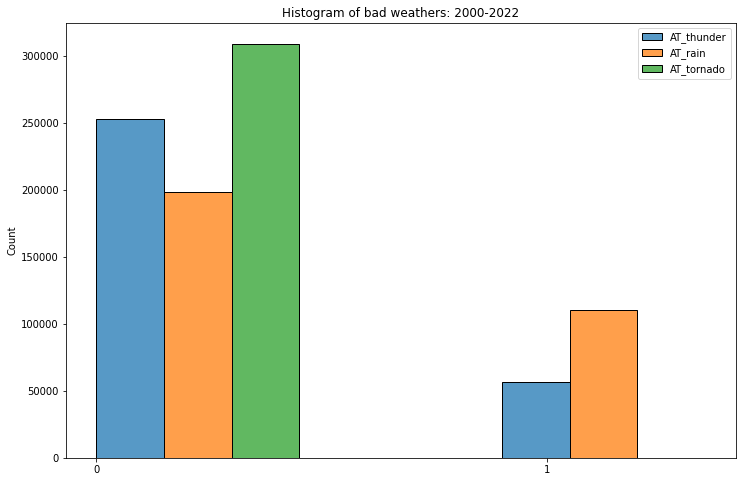

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(data = df_raw[['AT_thunder','AT_rain','AT_tornado']], multiple="dodge", binwidth=0.45)
plt.xticks((0,1))
plt.title('Histogram of bad weathers: 2000-2022')

In [32]:
X = df_raw[X_cols]
y = df_raw[y_col]

In [9]:
## Normalize

# X_mean = np.average(X_unnorm,axis=0)
# X_var = np.var(X_unnorm, axis=0)

# X = (X_unnorm - X_mean) / np.sqrt(X_var)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False, random_state=1) # Train, Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.18, shuffle=True, random_state=1)

Text(0.5, 1.0, 'Histogram of bad weathers: 2000-2022, After oversampling')

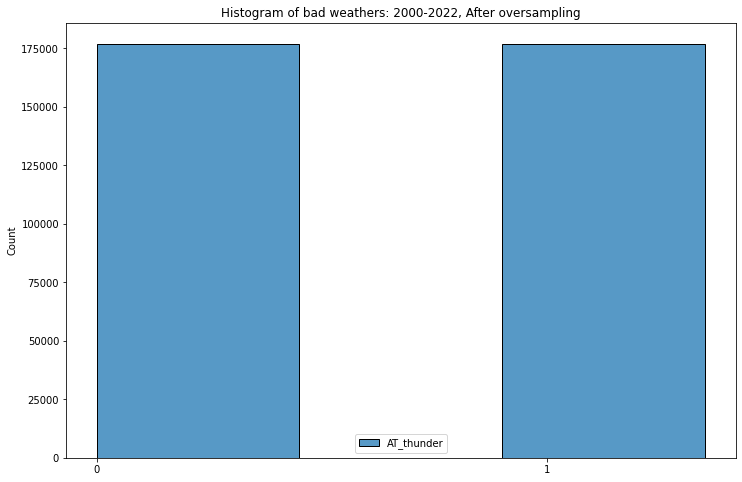

In [34]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

plt.figure(figsize=(12,8))
sns.histplot(data = y_train, multiple="dodge", binwidth=0.45)
plt.xticks((0,1))
plt.title('Histogram of bad weathers: 2000-2022, After oversampling')

In [35]:
X_train.head(3)

,DATE_month,DATE_day,DATE_hour,WND_angle,WND_speed,CIG_ceiling_height,VIS_distance,TMP_temp_celsius,DEW_temp_celsius,SLP_hectopascal
0,2,28,3,190.0,3.1,22000.0,16093.0,9.4,1.1,1024.6
1,11,28,21,50.0,3.1,22000.0,16093.0,18.9,2.8,1026.2
2,7,4,4,180.0,2.6,7620.0,14484.0,27.2,24.4,1015.2


In [36]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(354036, 10)
(47343, 10)
(46415, 10)


# Classifiers
https://www.kaggle.com/code/klaudiajankowska/binary-classification-multiple-method-comparison/notebook

In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

## Logistic Regression

In [38]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix, oversamplig'}>

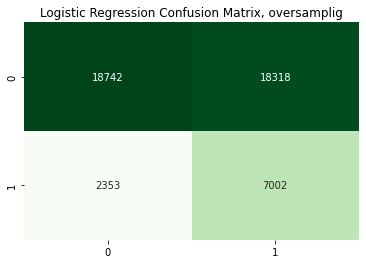

In [42]:
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_pred)
plt.title("Logistic Regression Confusion Matrix, oversamplig")
sns.heatmap(cm_logreg,cbar=False,annot=True,cmap="Greens",fmt="d")

In [40]:
LR_accuracy_test = accuracy_score(y_pred, y_test)
LR_accuracy_test

0.5546482818054508

## Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

<AxesSubplot:title={'center':'Decision Tree Confusion Matrix, Oversampling'}>

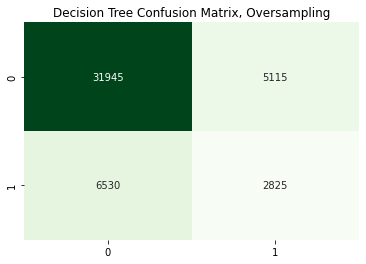

In [46]:
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
cm_dt = confusion_matrix(y_test,y_pred)
plt.title("Decision Tree Confusion Matrix, Oversampling")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
DT_accuracy_test = accuracy_score(y_pred, y_test)
DT_accuracy_test

0.7497145319401056

## SVM

In [19]:
# SVM = SVC(probability = True)

# scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

# sorted(scores.keys())
# SVM_fit_time = scores['fit_time'].mean()
# SVM_score_time = scores['score_time'].mean()
# SVM_accuracy = scores['test_accuracy'].mean()
# SVM_precision = scores['test_precision_macro'].mean()
# SVM_recall = scores['test_recall_macro'].mean()
# SVM_f1 = scores['test_f1_weighted'].mean()
# SVM_roc = scores['test_roc_auc'].mean()

/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## LDA

In [49]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [50]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,y_train)
y_pred = LDA.predict(X_test)
LDA_accuracy_test = accuracy_score(y_pred, y_test)
LDA_accuracy_test

0.5548852741570613

In [70]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.model_selection import cross_val_predict

# decisions_scores = cross_val_predict(LDA, X_train, y_test, cv=3, method="decision_function") 
# precisions, recalls, thresholds = precision_recall_curve(y_test, decisions_scores)

<AxesSubplot:title={'center':'LDA Confusion Matrix, Oversampling'}>

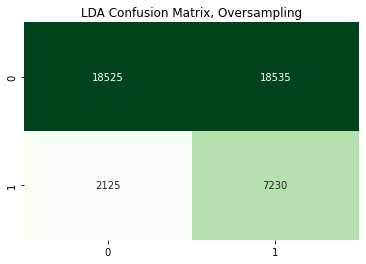

In [52]:
cm_lda = confusion_matrix(y_test,y_pred)
plt.title("LDA Confusion Matrix, Oversampling")
sns.heatmap(cm_lda,cbar=False,annot=True,cmap="Greens",fmt="d")

## QDA

In [53]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [54]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
y_pred = QDA.predict(X_test)
QDA_accuracy_test = accuracy_score(y_pred, y_test)
QDA_accuracy_test

0.5804373586125176

## Random Forest

In [56]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [57]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
random_forest_accuracy_test = accuracy_score(y_pred, y_test)
random_forest_accuracy_test

0.8037703328665302

<AxesSubplot:title={'center':'Random Forest Confusion Matrix, Oversampling'}>

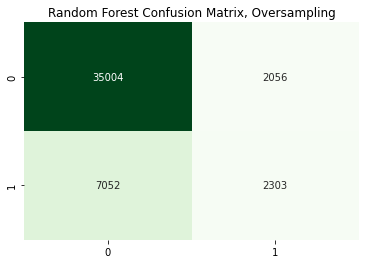

In [59]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test,y_pred)
plt.title("Random Forest Confusion Matrix, Oversampling")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")

## KNN

In [60]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [61]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
KNN_accuracy_test = accuracy_score(y_pred, y_test)
KNN_accuracy_test

0.642335451901325

<AxesSubplot:title={'center':'KNN Confusion Matrix, Oversampling'}>

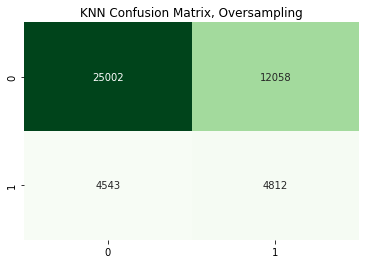

In [62]:
cm_knn = confusion_matrix(y_test,y_pred)
plt.title("KNN Confusion Matrix, Oversampling")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Greens",fmt="d")

## Naive Bayes

In [63]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=5)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [64]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)
y_pred = bayes.predict(X_test)
bayes_accuracy_test = accuracy_score(y_pred, y_test)
bayes_accuracy_test

0.5181730044166757

## Majority baseline

In [68]:
print('Mode y_train: ', y_train.mode().iloc[0][0])
y_pred = np.zeros(len(y_test))
baseline_test = accuracy_score(y_pred,y_test)

Mode y_train:  0


In [69]:
# models_correlation = pd.DataFrame({
#     'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
#     'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
#     'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
#     'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
#     'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
#     'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
#     'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
#     'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
#     }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time,  LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time,  LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_correlation.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
4,Random Forest,35.451710,3.713448,0.988224,0.988442,0.988224,0.988223,0.999857
1,Decision Tree,1.737915,0.032007,0.972141,0.973460,0.972141,0.972122,0.972141
5,K-Nearest Neighbors,0.422793,16.844038,0.842310,0.858049,0.842310,0.840559,0.927069
3,Quadratic Discriminant Analysis,0.193675,0.052329,0.671245,0.686033,0.671245,0.664577,0.748691
2,Linear Discriminant Analysis,0.548120,0.050498,0.641870,0.650880,0.641870,0.636442,0.690803
0,Logistic Regression,1.886697,0.029195,0.632823,0.638353,0.632823,0.629125,0.684440
6,Bayes,0.111904,0.121245,0.620892,0.639368,0.620892,0.607893,0.701009


In [74]:
models_correlation_test = pd.DataFrame({
    'Model'       : ['Baseline Majority','Logistic Regression', 'Decision Tree', 'LDA', 'QDA', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    # 'Fitting time': [LR_fit_time, dtree_fit_time,  LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    # 'Scoring time': [LR_score_time, dtree_score_time,  LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [baseline_test, LR_accuracy_test, DT_accuracy_test, LDA_accuracy_test, QDA_accuracy_test, random_forest_accuracy_test, KNN_accuracy_test, bayes_accuracy_test],
    # 'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    # 'Recall'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    # 'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    # 'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    },
    #columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])
    columns = ['Model',  'Accuracy'])

models_correlation_test.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,0.803770
0,Baseline Majority,0.798449
2,Decision Tree,0.749715
6,K-Nearest Neighbors,0.642335
4,QDA,0.580437
3,LDA,0.554885
1,Logistic Regression,0.554648
7,Bayes,0.518173


<Figure size 432x144 with 0 Axes>

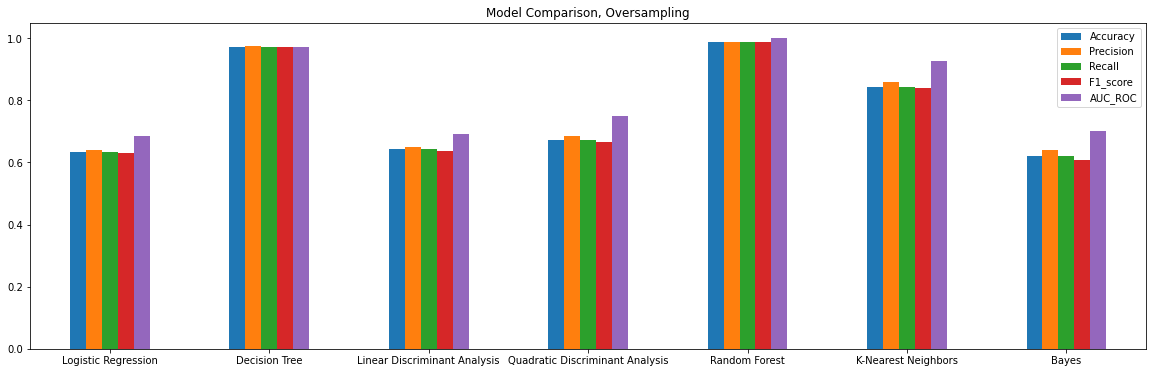

In [75]:
models_correlation_plot = models_correlation[['Model','Accuracy','Precision','Recall','F1_score','AUC_ROC']]

plt.figure(figsize=(6, 2))
ax = models_correlation_plot.plot.bar(rot=0,figsize=(20, 6))
ax.set_xticklabels(models_correlation_plot.Model)
ax = plt.title('Model Comparison, Oversampling')

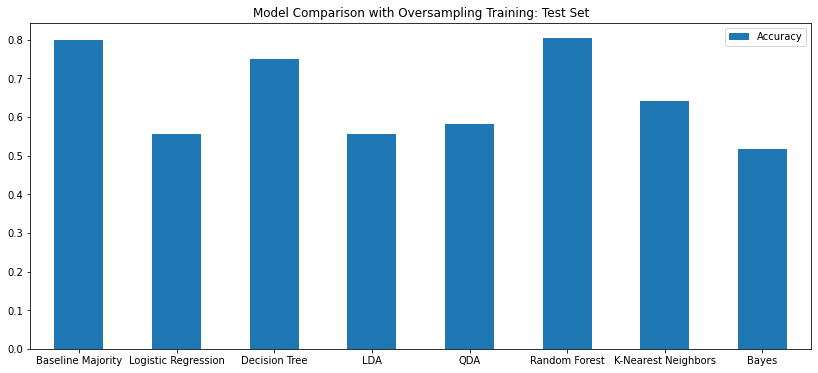

In [78]:
models_correlation_test

ax = models_correlation_test.plot.bar(rot=0,figsize=(14, 6))
ax.set_xticklabels(models_correlation_test.Model)
ax = plt.title('Model Comparison with Oversampling Training: Test Set')

# Ensemble

In [51]:
models = [LogisticRegression(),
         DecisionTreeClassifier(),
         #SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [52]:
for model in models:
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in label

## Hard

In [53]:
models_ens = list(zip(['LR', 'DT', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

## Soft

In [54]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, y_train)
pred = model_ens.predict(X_test)
prob = model_ens.predict_proba(X_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

## Comparison

In [55]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling_hard,0.80125,0.567992,0.058044,0.105324,not applicable
1,Ensembling_soft,0.79875,0.506173,0.061358,0.109448,0.686952


<Figure size 432x144 with 0 Axes>

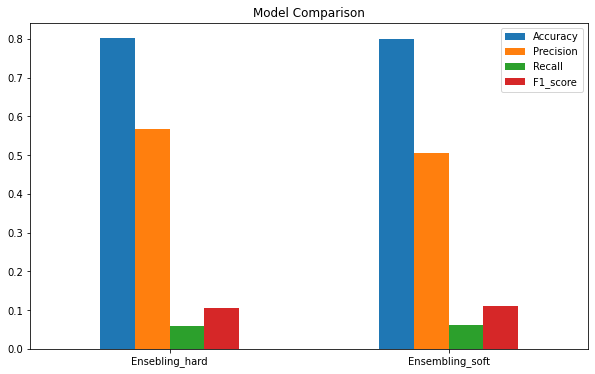

In [59]:
models_ensembling_plot = models_ensembling[['Model','Accuracy','Precision','Recall','F1_score','AUC_ROC']]

plt.figure(figsize=(6, 2))
ax = models_ensembling_plot.plot.bar(rot=0,figsize=(10, 6))
ax.set_xticklabels(models_ensembling_plot.Model)
ax = plt.title('Model Comparison')

# Baseline

Mode y_train:  0
